K-Means ou k-médias
=================

Primeiramente, vamos entender detalhes de implementação do algortimo. Em seguida, serão abordadas particularidades sobre como o algoritmo performa sobre determinados cenários.

Foi desenvolvido um script python utilizando somente os pacotes numpy e matplotlib cujo os imports necessários estão no seguinte passo:

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

Conjunto de dados
-------------------

Uma vez que os imports já estão feitos, agora é necessário carregar a matriz de dados. Para isso, utilizamos uma função pronta da biblioteca numpy, que carrega o .txt já como uma matriz.

In [22]:
def load_dataset(name):
    return np.loadtxt(name)

Métodos de distância
--------------------

Sabendo que o algoritmo aqui demonstrado funciona baseado em distâncias, vamos definir algumas distâncias que podemos usar passando a como parâmetro pra o método que executá o algoritmo k-means propriamente dito.

Observe que o pacote numpy implementa a função norma, e quando fazemos a subtração de 'a' por 'b' temos um método correspondente a distância euclidiana. 

Podemos ter mais funções aqui. 

In [23]:
def euclidian(a, b):
    return np.linalg.norm(a-b)

O algoritmo k-means
-------------

Com os passos anteriores, já temos o necessário para construir o nosso algoritmo, que receberá como parâmetros:

- K: A quantidade de clusters (obrigatório)
- epsilon: O erro mínimo para ser utilizado na condição de parada (Opcional, Default == 0)
- distance: O método que será utilizado para calcular a distância (Opcional, Defalut == 0)


E tem como retorno:

- Os centroids
- O histórico de evolução dos centroids
- E o vetor de associação de cada instância com seu respectivo centroid

Abaixo há a função completa que executa o algoritmo kmeans para um problema 2d. Como a intenção aqui é demonstrar como o algoritmo funciona, foi gerado um dataset com 2 cluster já separados, apenas para que seja observado o funcionamento do algoritmo. 

No decorrer deste documento, será destrinchado cada detalhe de implementação, e no final, serão apontadas particularidades do algoritmo kmeans em datasets mais complexos.



In [24]:
def kmeans(k, epsilon=0, distance='euclidian'):
    history_centroids = []
    if distance == 'euclidian':
        dist_method = euclidian
    dataset = load_dataset('durudataset.txt')
    # dataset = dataset[:, 0:dataset.shape[1] - 1]
    num_instances, num_features = dataset.shape
    prototypes = dataset[np.random.randint(0, num_instances - 1, size=k)]
    history_centroids.append(prototypes)
    prototypes_old = np.zeros(prototypes.shape)
    belongs_to = np.zeros((num_instances, 1))
    norm = dist_method(prototypes, prototypes_old)
    iteration = 0
    while norm > epsilon:
        iteration += 1
        norm = dist_method(prototypes, prototypes_old)
        prototypes_old = prototypes
        for index_instance, instance in enumerate(dataset):
            dist_vec = np.zeros((k, 1))
            for index_prototype, prototype in enumerate(prototypes):
                dist_vec[index_prototype] = dist_method(prototype,
                                                        instance)

            belongs_to[index_instance, 0] = np.argmin(dist_vec)

        tmp_prototypes = np.zeros((k, num_features))

        for index in range(len(prototypes)):
            instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
            prototype = np.mean(dataset[instances_close], axis=0)
            # prototype = dataset[np.random.randint(0, num_instances, size=1)[0]]
            tmp_prototypes[index, :] = prototype

        prototypes = tmp_prototypes

        history_centroids.append(tmp_prototypes)

    # plot(dataset, history_centroids, belongs_to)

    return prototypes, history_centroids, belongs_to



Plotagem
---------------

Para observarmos o algorimto de uma forma mais amigável, abaixo está uma função que plota o dataset 2d, e colore os pontos associados a cada centroid de vermelho e verde, além de plotar os centroids em cor azul. Se executado o algotimo por uma versão nativa do python, é possível observar os centroids se movendo até irem parar no meio das massas de daddos.

In [25]:
def plot(dataset, history_centroids, belongs_to):
    colors = ['r', 'g']

    fig, ax = plt.subplots()

    for index in range(dataset.shape[0]):
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
        for instance_index in instances_close:
            ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'o'))

    history_points = []
    for index, centroids in enumerate(history_centroids):
        for inner, item in enumerate(centroids):
            if index == 0:
                history_points.append(ax.plot(item[0], item[1], 'bo')[0])
            else:
                history_points[inner].set_data(item[0], item[1])
                print("centroids {} {}".format(index, item))

                plt.show()


Execução
--------------

Para executar o algoritmo, foi escrito a função abaixo, que apenas carrega o dataset para a plotagem dos dados e centroids, e executa o a função kmeans, e faz uma chamada a função plot.

In [26]:
def execute():
    dataset = load_dataset('durudataset.txt')
    centroids, history_centroids, belongs_to = kmeans(2)
    plot(dataset, history_centroids, belongs_to)



<IPython.core.display.Javascript object>


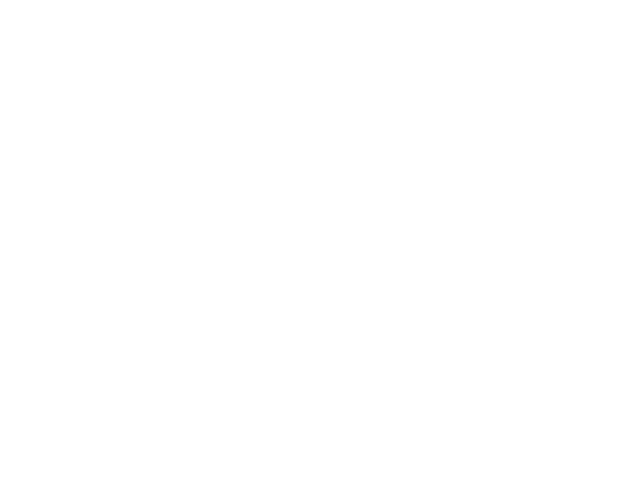

centroids 1 [ 0.21116644  0.28487927]
centroids 1 [ 1.52693812  1.51232693]
centroids 2 [ 0.22331067  0.28960446]
centroids 2 [ 1.58058247  1.56897412]
centroids 3 [ 0.22331067  0.28960446]
centroids 3 [ 1.58058247  1.56897412]
centroids 4 [ 0.22331067  0.28960446]
centroids 4 [ 1.58058247  1.56897412]


In [27]:
%matplotlib notebook

execute()

Destrinchando
-----------------


Se cada bloco de código anterior a esta célula for executado, a função execute [7], deve gerar um gráfico, com os clusters encontrados pelo algoritmo.

Feito isso, agora serão demonstrados detalhes de implementação, onde o usuário poderar verificar executando as próximas células o que está acontecendo dentro do código.

No próximo trecho de código, a ideia é carregar o dataset, e verificar se realmente foi carregado, verificando o seu tamanho.

In [28]:
dataset = np.loadtxt("durudataset.txt")
dataset.shape

(40, 2)

Agora que já se tem o dataset carregado, precisamos testar a função de distância. Para fins didáticos, será utilizada apenas distância euclidiana, mas o algoritmo da forma como está implementado ao longo deste notebook, está preparado para trabalhar com outras distâncias. 


A distência euclidiana é dada da seguinte forma:

$$d(p, q) =  \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2}$$

Logo, se aplicarmos a formula para dois pontos p(2, 2) e q(3, 3) deveremos ter um resultado igual a 1.414214



In [29]:
euclidian(np.array([2, 2]), np.array([3, 3]))

1.4142135623730951

A distância estando funcionando segundo a formula, então, chegamos a parte do algoritmo propriamente dito. No próximo bloco, será setado o método de calculo de distância, passando a referência da função que foi definino do início deste notebook, além de uma lista para guardar a evolução que os centroids durante o processo do algoritmo. Na linha seguinte estamos salvando o número de instancias, que é o número de linhas do nosso dataset, e o número de características.

In [30]:
history_centroids = []
dist_method = euclidian
num_instances, num_features = dataset.shape

num_instances, num_features

(40, 2)

Com tudo feito, agora é necessário selecionar os centroids iniciais, que achi chamamos de protótipos. Para isso, é feito uma chamada pra o método randint do numpy, que gera um vetor de k números inteiros aleatórios como se observa na próxima célula. 

```
Em python, se é passado para um vetor um outro vetor, ele trás os elementos correspondentes aos índices do vetor interno.

```

In [31]:
k = 2
prototypes = dataset[np.random.randint(0, num_instances - 1, size=k)]
dataset[np.random.randint(0, num_instances - 1, size=k)]

array([[ 0.27608751,  0.49760799],
       [ 0.28549554,  0.29350958]])

Na próxima linha guardamos os primeiros centroids na lista de histórico, criamos uma outra lista chamada prototypes_old, que guardará os protótipos anteriores, e será inicializada com zeros, além de criarmos mais uma lista que será responsável por guardar a pertinência de cada instância a cada cluster(belongs_to). A lista belongs_to, também será inicializada com zeros. 

In [32]:
history_centroids.append(prototypes)
prototypes_old = np.zeros(prototypes.shape)
belongs_to = np.zeros((num_instances, 1))

Para que se saiba a hora que o algoritmo deve parar, será necessário estabelecer uma condição de parada. No caso deste notebook, será adorado a diferença entre os protótipos antigos e os novos, ou seja, quando os protótipos novos pararem de se movimentar, o algoritmo deve parar.

In [33]:
norm = dist_method(prototypes, prototypes_old)
dist_method(prototypes, prototypes_old)

2.2576599122750021

Esta é célula mais importante deste notebook. É nela que está o algoritmo k-means que queremos observar. Por questões didáticas, os comentários sobre este bloco serão feitos dentro do código.

<IPython.core.display.Javascript object>


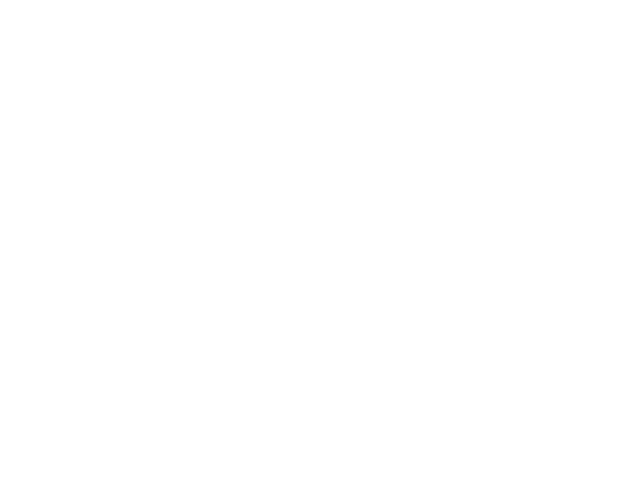

centroids 1 [ 1.58058247  1.56897412]
centroids 1 [ 0.22331067  0.28960446]
centroids 2 [ 1.58058247  1.56897412]
centroids 2 [ 0.22331067  0.28960446]
centroids 3 [ 1.58058247  1.56897412]
centroids 3 [ 0.22331067  0.28960446]


In [34]:
iteration = 0
epsilon = 1e-10
while norm > epsilon:
    iteration += 1
    norm = dist_method(prototypes, prototypes_old)
    prototypes_old = prototypes
    for index_instance, instance in enumerate(dataset):
        dist_vec = np.zeros((k, 1))
        for index_prototype, prototype in enumerate(prototypes):
            # aqui calculamos a distância de cada centroid, para cada instancia
            # do conjunto de dados. 
            dist_vec[index_prototype] = dist_method(prototype,
                                                    instance)
        # aqui adicionamos da linsta, para cada instância, qual o centroid fica mais próximo.
        belongs_to[index_instance, 0] = np.argmin(dist_vec)

    tmp_prototypes = np.zeros((k, num_features))

    for index in range(len(prototypes)):
        # aqui, pegamos todos as instâncias que foram associadas a cada centroid, calculamos a média
        # e atualizamos os centroids com esses valores.
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
        prototype = np.mean(dataset[instances_close], axis=0)
        # prototype = dataset[np.random.randint(0, num_instances, size=1)[0]]
        tmp_prototypes[index, :] = prototype

    prototypes = tmp_prototypes

    history_centroids.append(tmp_prototypes)

plot(dataset, history_centroids, belongs_to)
    
    

Com o conteúdo abordado até aqui, é possível observar o funcionamento do algoritmo e entender o seu funcionamento básico. Porém, uma forma vizual de como o algoritmo trabalha dentro da massa de dados, é uma boa forma de fixar a ideia por trás do algoritmo. Por isso, na próxima célula, a cada execução, será mostrada a evolução dos centroids dentro do gráfico.

In [35]:
%matplotlib notebook
def plot_step_by_step(dataset, history_centroids, belongs_to):
    colors = ['r', 'g']

    fig, ax = plt.subplots()

    for index in range(dataset.shape[0]):
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
        for instance_index in instances_close:
            ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'o'))

    history_points = []
    for index, centroids in enumerate(history_centroids):
        for inner, item in enumerate(centroids):
            if index == 0:
                history_points.append(ax.plot(item[0], item[1], 'bo')[0])
            else:
                history_points[inner].set_data(item[0], item[1])
                print("centroids {} {}".format(index, item))
                
                plt.pause(0.8)


<IPython.core.display.Javascript object>


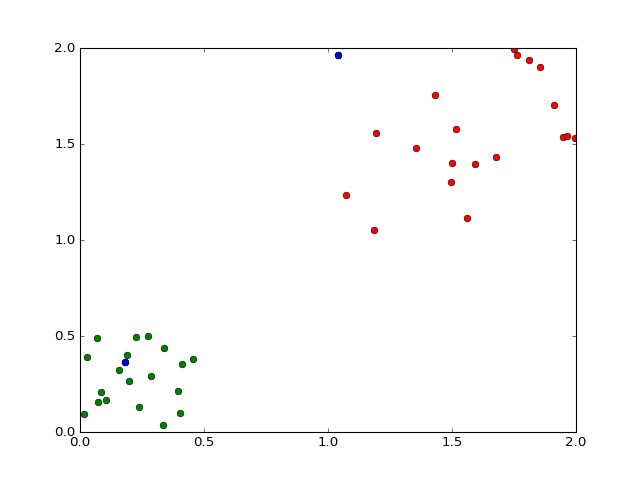

<IPython.core.display.Javascript object>


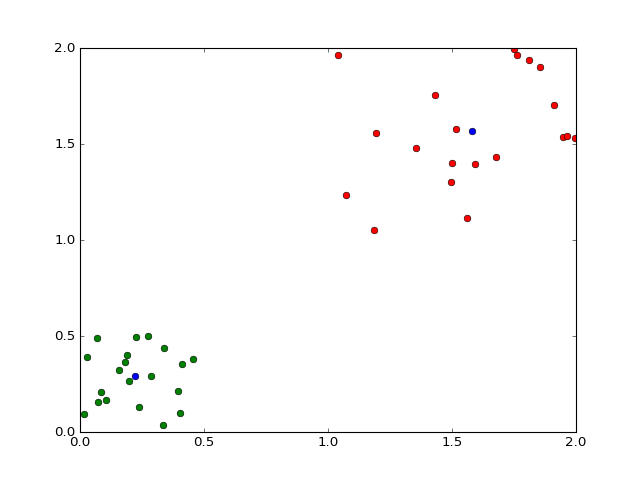

<IPython.core.display.Javascript object>


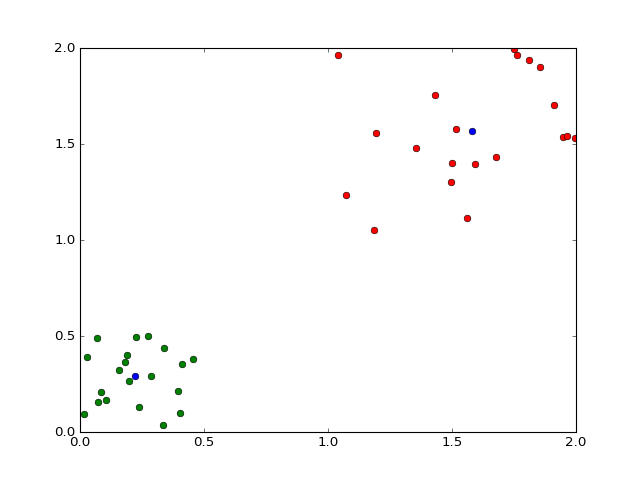

<IPython.core.display.Javascript object>


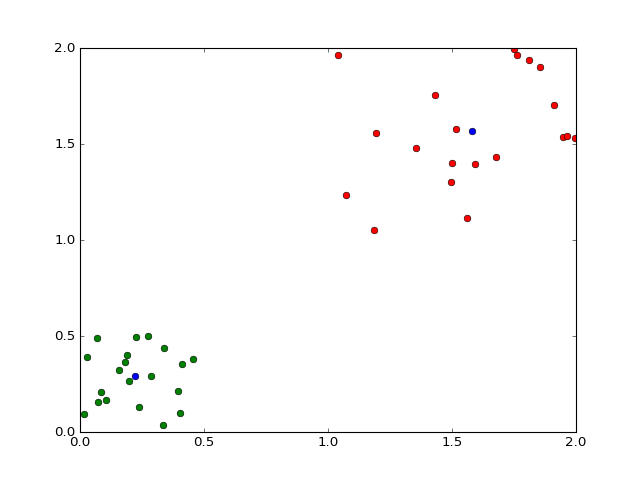

In [36]:
for item in history_centroids:
    plot_step_by_step(dataset, [item], belongs_to)
